In [1]:
import pandas as pd
import utils as my

## Dataset

In [2]:
dataset = pd.read_csv("./boston-housing.csv",
                      header=None, delimiter=r"\s+",
                      names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                             'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
target_name = "MEDV"

print(">> Data shape:", dataset.shape)
dataset.head(10)

>> Data shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Missing values and duplicates

In [4]:
print(">> Missing values:", dataset.isnull().any().sum())
print(">> Duplicate values:", dataset.duplicated().sum())

# dataset.drop_duplicates(inplace=True, keep='first', ignore_index=True)
# print(">> Duplicate values:", dataset.duplicated().sum())

>> Missing values: 0
>> Duplicate values: 0


### Unique values

In [5]:
n_data = dataset.shape[0]

print(">> n_unique = 1:       ", len(my.get_nunique_features(dataset, value=1)))
print(">> n_unique = n_data:  ", len(my.get_nunique_features(dataset, value=n_data)))
print(">> n_unique > n_data-5:", len(my.get_nunique_features(dataset, value=n_data-5, kind='greater_than')))
print(">> n_unique < 3        ", len(my.get_nunique_features(dataset, value=2, kind='less_than')))

>> n_unique = 1:        0
>> n_unique = n_data:   0
>> n_unique > n_data-5: 1
>> n_unique < 3         0


## Data types

### Ignore features

In [6]:
dataset = pd.read_csv("./boston-housing.csv",
                      header=None, delimiter=r"\s+",
                      names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                             'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
print(">> Initial:\n", dataset.dtypes.value_counts())

ignore_features = []
ignore_features += my.get_nunique_features(dataset, value=1)
ignore_features += my.get_nunique_features(dataset, value=dataset.shape[0])
ignore_features = list(set(ignore_features))

if target_name in ignore_features:
    ignore_features.remove(target_name)

print(ignore_features)
# dataset.drop(ignore_features, axis=1, inplace=True)
print(">> After dropping features:\n", dataset.dtypes.value_counts())

>> Initial:
 float64    12
int64       2
dtype: int64
[]
>> After dropping features:
 float64    12
int64       2
dtype: int64


### Numerical features

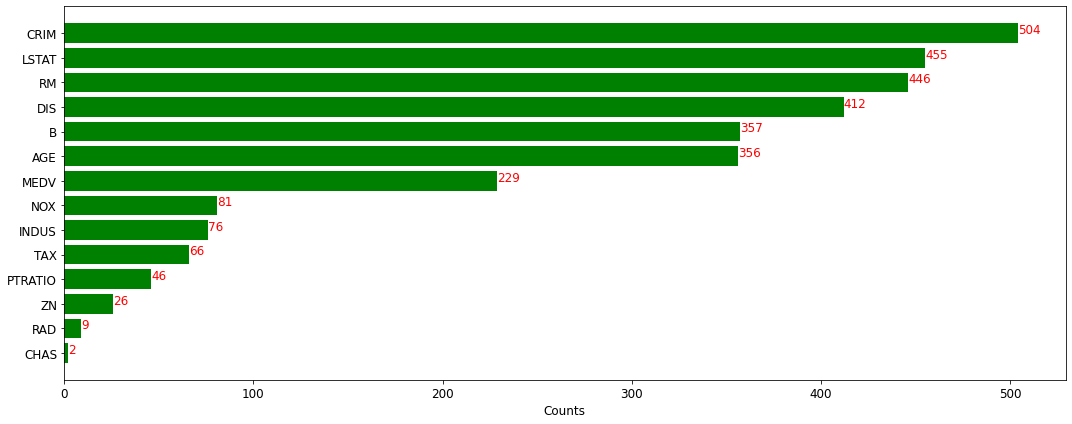

In [7]:
numerical_features = dataset.select_dtypes(include='number').columns.values
my.show_counts(dataset, numerical_features)

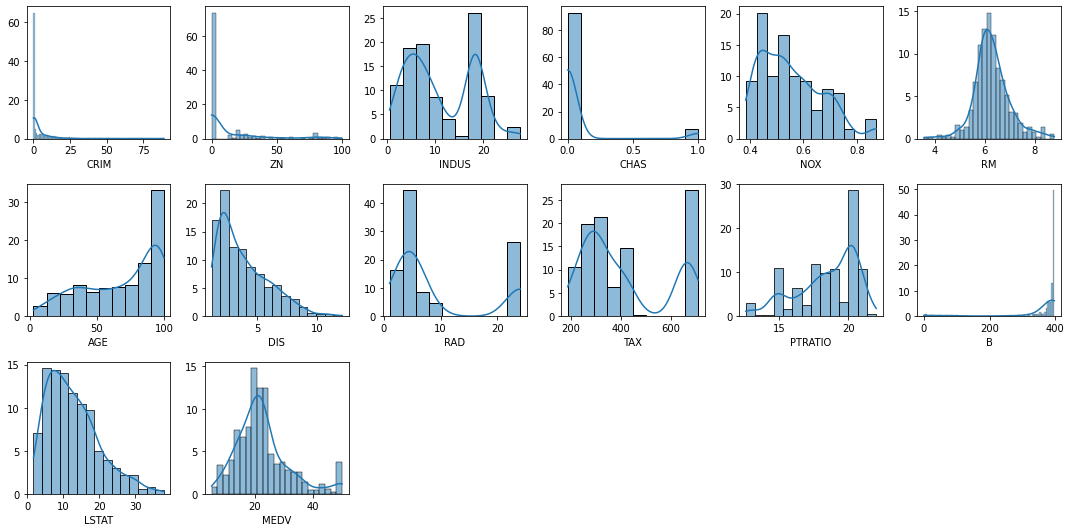

In [9]:
# feature_names = my.get_nunique_features(dataset[numerical_features], value=2, kind="greater_than")
my.show_histogram(dataset, numerical_features, kde=True)

In [ ]:
## Top 10%
# feature_names = my.get_nunique_features(dataset[numerical_features], value=n_data*0.9, kind="greater_than")
# my.show_histogram(dataset, feature_names, target=None, kde=True)

In [ ]:
## Bottom 10%
# feature_names = my.get_nunique_features(dataset[numerical_features], value=n_data*0.1, kind="less_than")
# my.show_histogram(dataset, feature_names, target=None, kde=True)

### Categorical features

In [11]:
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
print(categorical_features)
# my.show_counts(dataset, categorical_features, color='blue')

[]


In [ ]:
# feature_names = my.get_nunique_features(dataset[categorical_features], value=1, kind="greater_than")
# my.show_histogram(dataset, feature_names, target=target_name, xlabels=False)

### Ordinal features

In [ ]:
ordinal_features = None
# my.show_histogram(dataset, ordinal_features, target=target_name)

### High cardinality features

In [ ]:
high_cardianlity_features = None
# my.show_histogram(dataset, high_cardianlity_features, target=target_name)

### Group features

In [ ]:
group_features = None
# my.show_histogram(dataset, group_features, target=target_name)

### Bin number features

In [ ]:
group_features = None
# my.show_histogram(dataset, group_features, target=target_name)

## Correlations between features

### Numerical Features - Peason's R

In [12]:
numerical_features = dataset.select_dtypes(include='number').columns.values
high_corr_features, (names, values) = my.get_high_corr_numerical(
                                        dataset, numerical_features, threshold=0.7)
high_corr_features

Pearson's R = 0.9102 - ['RAD' 'TAX']
Pearson's R = 0.7637 - ['INDUS' 'NOX']
Pearson's R = 0.7315 - ['NOX' 'AGE']
Pearson's R = 0.7208 - ['INDUS' 'TAX']
Pearson's R = -0.7080 - ['INDUS' 'DIS']
Pearson's R = -0.7377 - ['LSTAT' 'MEDV']
Pearson's R = -0.7479 - ['AGE' 'DIS']
Pearson's R = -0.7692 - ['NOX' 'DIS']


['AGE', 'INDUS', 'LSTAT', 'NOX', 'RAD']

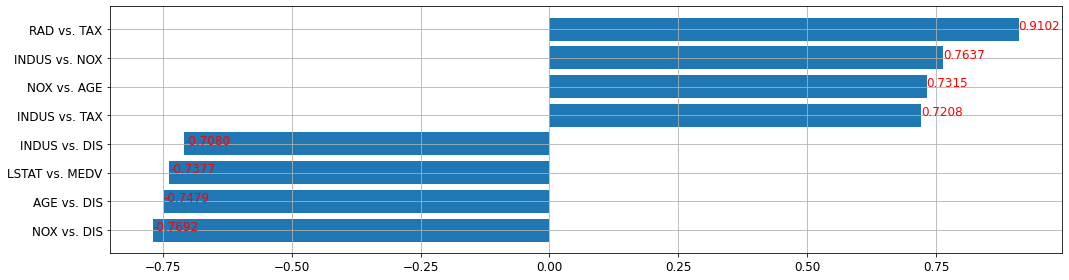

In [13]:
my.show_correlations(names, values, threshold=0.7)

### Categorical features - Cramer's V

In [ ]:
# categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
# dataset_encoded = pd.get_dummies(dataset[categorical_features])
# categorical_features = dataset_encoded.columns.values

# high_corr_features, (names, values) = my.get_high_corr_categorical(
#                                             dataset_encoded, categorical_features, threshold=0.8)

In [ ]:
# my.show_correlations(names, values, threshold=0.5)